In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import glob
import os

from hw3_defs import normalize_images, grayscale_images, find_features, get_matches
from fundamental_matrix import getFundamentalMat, F_from_ransac, drawlines, RansacModel

In [3]:
# Save images in a list
imgs = []
dir_name = 'buddha_images/'
list_of_files = sorted( filter( os.path.isfile, glob.glob(dir_name + '*')))
for file_path in list_of_files: imgs.append(cv2.cvtColor(cv2.imread(file_path),cv2.COLOR_BGR2RGB))

imgs_norm = normalize_images(imgs)
imgs_gray = grayscale_images(imgs_norm)
img_h, img_w = imgs_gray[0].shape

In [4]:
# Same Hyperparameter settings as HW3
sift = cv2.SIFT_create(nfeatures=5000, nOctaveLayers=16, contrastThreshold=0.025, edgeThreshold=10, sigma=1.4)

kp, des, imgs_sift = find_features(sift, imgs_gray)

In [10]:
i = 5
(pts1, pts2), good = get_matches(kp[i],des[i],kp[i+1],des[i+1])

F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.RANSAC,1.0)

pts11 = np.array([pts1[:, 0],
                pts1[:,1],
                np.ones(pts1.shape[0])])

pts21 = np.array([pts2[:, 0],
                pts2[:,1],
                np.ones(pts2.shape[0])])


model = RansacModel()
F1, mask1 = F_from_ransac(pts11, pts21, model)

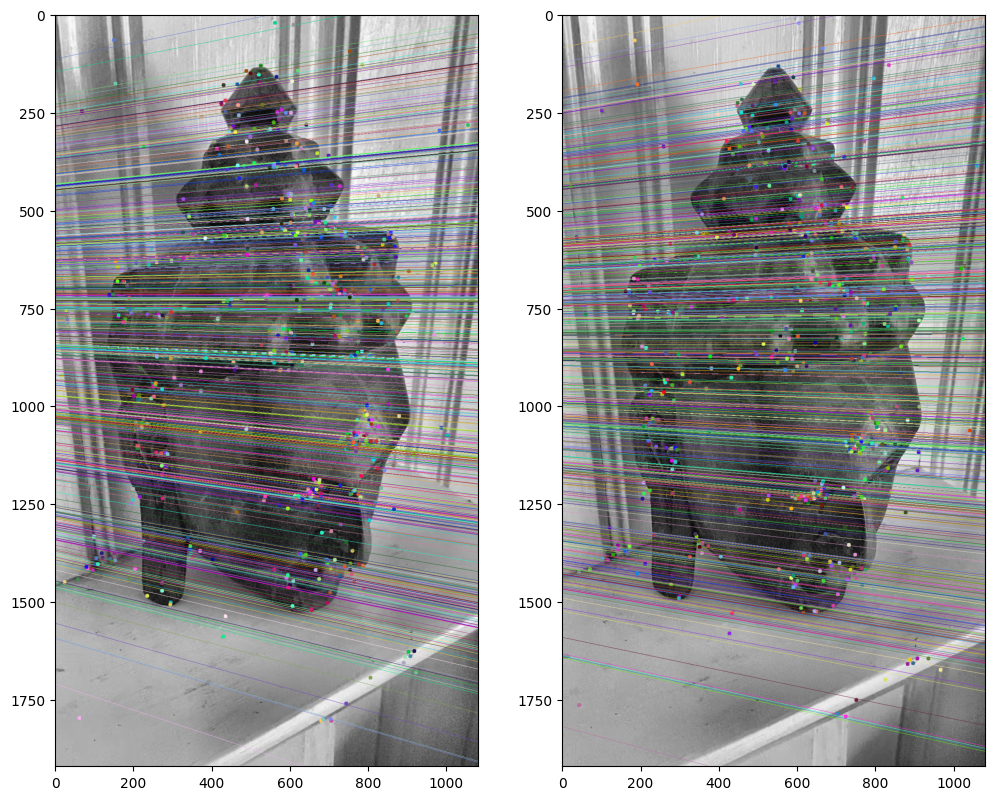

In [11]:
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F1)
lines1 = lines1.reshape(-1,3)
img_left, _ = drawlines(imgs_gray[i],imgs_gray[i+1],lines1,pts1,pts2)

lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F1)
lines2 = lines2.reshape(-1,3)
img_right, _ = drawlines(imgs_gray[i+1],imgs_gray[i],lines2,pts2,pts1)

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(img_left)
plt.subplot(122),plt.imshow(img_right)
plt.show()

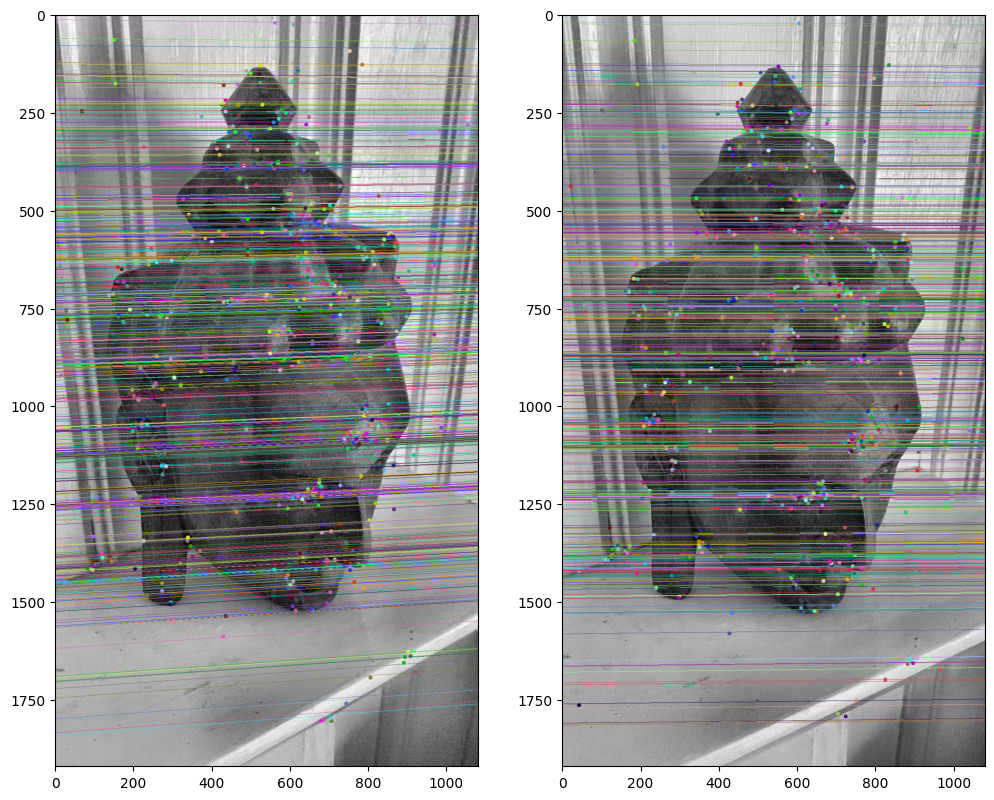

In [12]:
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img_left, _ = drawlines(imgs_gray[i],imgs_gray[i+1],lines1,pts1,pts2)

lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img_right, _ = drawlines(imgs_gray[i+1],imgs_gray[i],lines2,pts2,pts1)

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(img_left)
plt.subplot(122),plt.imshow(img_right)
plt.show()